In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [3]:
df = pd.read_csv(url, header = None)

In [4]:
# specifying the header names in to a new variable 'headers'
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", \
           "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", \
          "engine-size", "fuel-system", "bore", "stroke", "compensation-ratio", "horsepower", "peak-rpm", \
          "city-mpg", "highway-mpg", "price"]

# Assigning the headers as column name of the DataFrame
df.columns = headers

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compensation-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Identify and Handle Missing Values

### Convert "?" to NaN

In [6]:
# replcae "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compensation-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluating for Missing Data

In [7]:
missing_data = df.isnull()
missing_data.head(5)

# "True" indicates a Missing Value
# "False" indicates a Non-Missing Value

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compensation-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Count missing values in each column

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## Deal with Missing Data

### Calculate the Average of the Column

In [9]:
avg_norm_loss = df['normalized-losses'].astype("float").mean(axis = 0)
print("Average of normalized-losses: ", avg_norm_loss)

Average of normalized-losses:  122.0


### Replace "NaN" by mean value in "normalized-losses" column

In [10]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

### Calculating the mean value for "bore" column

In [11]:
avg_bore = df['bore'].astype('float').mean(axis = 0)
print("Average of bore: ", avg_bore)

Average of bore:  3.3297512437810957


### Replace "NaN" by mean value for "bore" column

In [12]:
df['bore'] = df['bore'].replace(np.nan, avg_bore, inplace = True)

### Similarly replacing "NaN" by mean for all Numeric Columns with Missing Data

In [13]:
df["horsepower"] = df["horsepower"].astype("float", copy=True)

In [14]:
avgHP = df["horsepower"].mean(axis=0)
print("Average of horsepower: ", avgHP)

Average of horsepower:  104.25615763546799


In [15]:
df["horsepower"].replace(np.nan, avgHP, inplace = True)

In [16]:
avg_stroke = df['stroke'].astype('float').mean(axis = 0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.2554228855721337


In [17]:
df['stroke'] = df['stroke'].replace(np.nan, avg_stroke, inplace = True)

In [18]:
df["peak-rpm"] = df["peak-rpm"].astype("float", copy=True)
avg_peakrpm = df["peak-rpm"].mean(axis=0)
print("Average of peak-rpm:", avg_peakrpm)

Average of peak-rpm: 5125.369458128079


In [19]:
df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace = True)

### Value Counts for a Particular Column

In [20]:
# To see which values are present in particular column
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [21]:
# Apart from value count, if we want to find the value that is most common, we use
df['num-of-doors'].value_counts().idxmax()

'four'

### Replace the Missing "num-of-doors" values by the most frequent

In [22]:
df['num-of-doors'].replace(np.nan, 'four', inplace = True)

### Dropping the rows that do not have the Price Data

In [23]:
df.dropna(subset = ['price'], axis = 0, inplace = True)

# resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compensation-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,None,None,9.0,111.0,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,None,None,9.0,111.0,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,None,None,9.0,154.0,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,None,None,10.0,102.0,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,None,None,8.0,115.0,5500.0,18,22,17450


## Correcting the Data Format

### Checking the Data Types for each Column

In [25]:
df.dtypes

symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compensation-ratio    float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                  object
dtype: object

### Converting Data Types to proper Format

In [26]:
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']] = df[['peak-rpm']].astype('float')

### Listing the Data Types for Columns after the Conversion

In [27]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compensation-ratio    float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

## Data Standardization

### Converting mpg to L/100km by mathematical operation (235 divided by mpg)

In [28]:
# Converting mpg to L/100km for "city-mpg"
df['city-L/100km'] = 235/df["city-mpg"]

# Checking Transformed Data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compensation-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,NaN,NaN,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,NaN,NaN,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,NaN,NaN,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,NaN,NaN,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,NaN,NaN,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [29]:
# Converting mpg to L/100km for "highway-mpg"
df['highway-L/100km'] = 235/df["highway-mpg"]

# Checking Transformed Data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compensation-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,NaN,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,NaN,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,NaN,NaN,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,NaN,NaN,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,NaN,NaN,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

### Scaling the columns "length", "width" and "height" to the ranges from 0 to 1

In [30]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

## Binning

### Transforming continuous numerical variables into discrete categorical "bins" (column: "horsepower")

In [31]:
# First convert the data type to correct format
df["horsepower"] = df["horsepower"].astype(int, copy=True)

### Plotting the Histogram of Horsepower to understand its distribution

Text(0.5, 1.0, 'horsepower Bins')

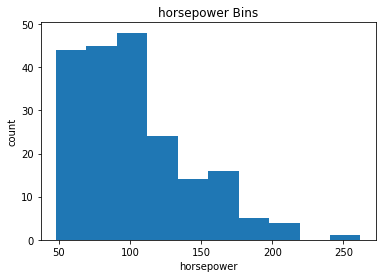

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# Putting the Labels and plot Title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower Bins")

### Dividing the bins to 3 bins of equal size

In [33]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [34]:
# Setting up the group names for bins
group_names = ['Low', 'Medium', 'High']

In [35]:
# Determining what each value of "horsepower" belongs to
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [36]:
# Number of Vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

### Plotting the distribution of each Bin

Text(0.5, 1.0, 'HorsePower Bins')

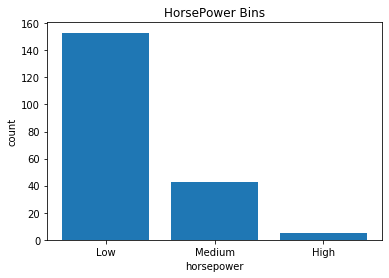

In [37]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# Labels
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("HorsePower Bins")

### Plotting a Histogram to visualize the distriution of bins we created

Text(0.5, 1.0, 'Horsepower Bins')

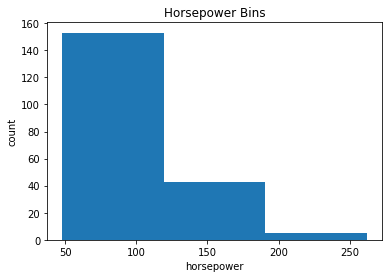

In [38]:
a = (0,1,2)

# Creating a histogram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# Setting Labels and Title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")

## Creating Indicator/Dummy Variable

### Converting "fuel-type" into Dummy Variable

In [39]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [40]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace = True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [41]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis = 1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace =True)

In [42]:
df.head(100)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,110,5500.0,19,25,15250.0,12.368421,9.400000,Low,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,110,5500.0,19,25,17710.0,12.368421,9.400000,Low,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,110,5500.0,19,25,18920.0,12.368421,9.400000,Low,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,140,5500.0,17,20,23875.0,13.823529,11.750000,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,101,5800.0,23,29,16430.0,10.217391,8.103448,Low,0,1


In [44]:
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compensation-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned', 'diesel',
       'gas'],
      dtype='object')


In [46]:
dummy_var_2 = pd.get_dummies(df["aspiration"])
dummy_var_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
dummy_var_2.rename(columns={'aspiration-type-std':'turbo', 'aspiration-type-std':'turbo'}, inplace = True)
dummy_var_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [48]:
# merge data frame "df" and "dummy_var_2"
df = pd.concat([df, dummy_var_2], axis = 1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace =True)

In [49]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


### As we have now cleaned our data, its the time to export this Data Frame as a new ".csv" file

In [50]:
df.to_csv('Used_Automobile_Clean_df.csv')